In [1]:
import re

import numpy as np
import pandas as pd

from random import randint, seed
from itertools import permutations
from tqdm import tqdm

In [2]:
data_path = '../data/modcloth_final_data.json'

In [185]:
df_records = pd.read_json(data_path, lines=True)

print('Number of records = {}'.format(len(df_records)))
print('-'*40)
print('Attribute List:')
print('-'*40)
df_records.columns = [x.replace(" ","_") for x in df_records.columns]
print(df_records.columns)

Number of records = 82790
----------------------------------------
Attribute List:
----------------------------------------
Index(['item_id', 'waist', 'size', 'quality', 'cup_size', 'hips', 'bra_size',
       'category', 'bust', 'height', 'user_name', 'length', 'fit', 'user_id',
       'shoe_size', 'shoe_width', 'review_summary', 'review_text'],
      dtype='object')


In [4]:
print(df_records.shape)
df_records.head(1)

(82790, 18)


,item_id,waist,size,quality,cup_size,hips,bra_size,category,bust,height,user_name,length,fit,user_id,shoe_size,shoe_width,review_summary,review_text
0,123373,29.0,7,5.0,d,38.0,34.0,new,36,5ft 6in,Emily,just right,small,991571,NaN,NaN,NaN,NaN


In [156]:
df_records.isna().sum()

item_id               0
waist             79908
size                  0
quality              68
cup_size           6255
hips              26726
bra_size           6018
category              0
bust              70936
height             1107
user_name             0
length               35
fit                   0
user_id               0
shoe_size         54875
shoe_width        64183
review_summary     6725
review_text        6725
dtype: int64

According to the paper,
- fit : is the target variable
- category, shoe_width, item_id, user_id : are treated as categorical and we learn embeddings for representing them
- quality, size, shoe_size, waist, bust, cup_size, bra_size, hips, height : are treated as regular categorical/numerical variables
- user_name, length, review_text and review_summary : are not considered

### Attribute Types

In [186]:
df_records.drop(['user_name', 'length', 'review_summary', 'review_text'], axis=1, inplace=True)
df_records.dtypes

item_id         int64
waist         float64
size            int64
quality       float64
cup_size       object
hips          float64
bra_size      float64
category       object
bust           object
height         object
fit            object
user_id         int64
shoe_size     float64
shoe_width     object
dtype: object

On inspection, 
- `fit` and `category` have no NaNs
- `bust` has too many NaNs, but we can try to calculate it
- `cup_size`, `bra_size` and `height` have some missing values (NaNs) --> try data imputation 
- `waist` and `shoe_size` has a lot of missing values, but we can try to estimate them using conditional distribution
- `shoe_width` is too generic and does the same job as `shoe_size`, therefore it's neglected

In [187]:
df_records.drop(['shoe_width'], axis=1, inplace=True)

### Missing Data Imputation
Let's check the values

In [8]:
df_records.head()

,item_id,waist,size,quality,cup_size,hips,bra_size,category,bust,height,fit,user_id,shoe_size
0,123373,29.0,7,5.0,d,38.0,34.0,new,36,5ft 6in,small,991571,NaN
1,123373,31.0,13,3.0,b,30.0,36.0,new,NaN,5ft 2in,small,587883,NaN
2,123373,30.0,7,2.0,b,NaN,32.0,new,NaN,5ft 7in,small,395665,9.0
3,123373,NaN,21,5.0,dd/e,NaN,NaN,new,NaN,NaN,fit,875643,NaN
4,123373,NaN,18,5.0,b,NaN,36.0,new,NaN,5ft 2in,small,944840,NaN


In [9]:
df_records.dtypes

item_id        int64
waist        float64
size           int64
quality      float64
cup_size      object
hips         float64
bra_size     float64
category      object
bust          object
height        object
fit           object
user_id        int64
shoe_size    float64
dtype: object

### Distribution imputation

In [22]:
df_records['shoe_size'].value_counts()

8.5     3982
8.0     3832
7.5     3704
9.0     3599
7.0     3193
10.0    2419
6.5     1829
9.5     1806
6.0     1338
11.0     860
5.5      589
10.5     356
5.0      316
11.5      91
38.0       1
Name: shoe_size, dtype: int64

In [188]:
df_records['shoe_size'] = df_records['shoe_size'].replace(38.0, 6.5)
df_records['shoe_size'].value_counts()

8.5     3982
8.0     3832
7.5     3704
9.0     3599
7.0     3193
10.0    2419
6.5     1830
9.5     1806
6.0     1338
11.0     860
5.5      589
10.5     356
5.0      316
11.5      91
Name: shoe_size, dtype: int64

<AxesSubplot:>

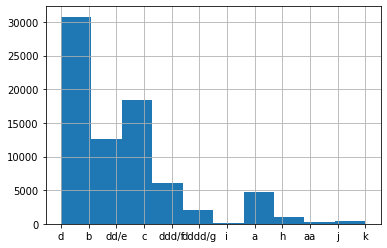

In [83]:
df_records[df_records['cup_size'].notna()]['cup_size'].hist()

<AxesSubplot:>

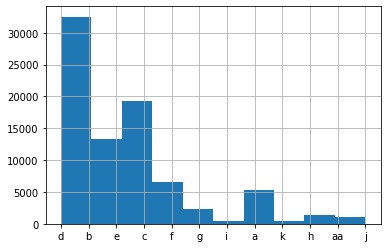

In [114]:
df_records[df_records['cup_size'].notna()]['cup_size'].hist()

<AxesSubplot:>

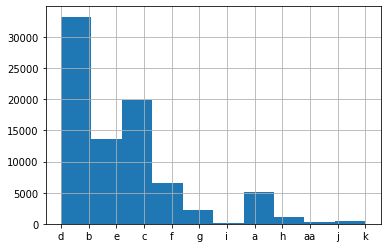

In [180]:
df_records[df_records['cup_size'].notna()]['cup_size'].hist()

<AxesSubplot:>

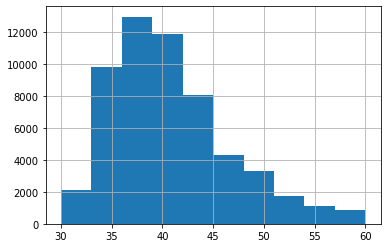

In [84]:
df_records[df_records['hips'].notna()]['hips'].hist()

<AxesSubplot:>

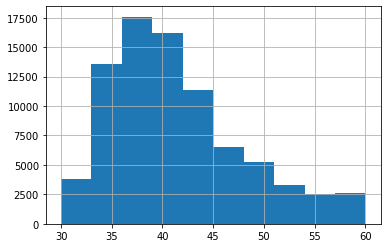

In [115]:
df_records[df_records['hips'].notna()]['hips'].hist()

<AxesSubplot:>

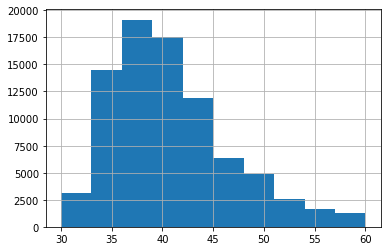

In [181]:
df_records[df_records['hips'].notna()]['hips'].hist()

<AxesSubplot:>

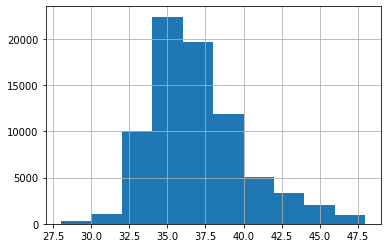

In [85]:
df_records[df_records['bra_size'].notna()]['bra_size'].hist()

<AxesSubplot:>

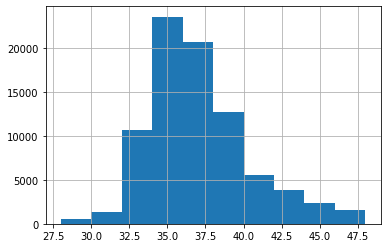

In [116]:
df_records[df_records['bra_size'].notna()]['bra_size'].hist()

<AxesSubplot:>

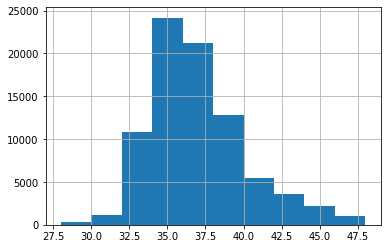

In [182]:
df_records[df_records['bra_size'].notna()]['bra_size'].hist()

<AxesSubplot:>

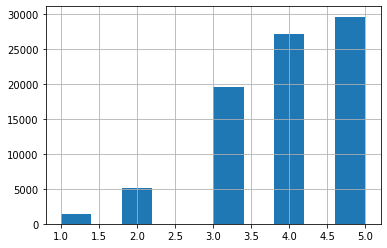

In [86]:
df_records[df_records['quality'].notna()]['quality'].hist()

<AxesSubplot:>

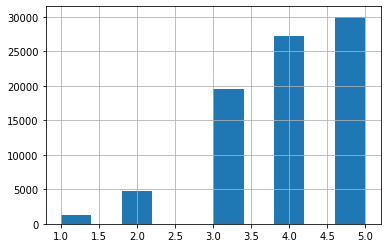

In [117]:
df_records[df_records['quality'].notna()]['quality'].hist()

<AxesSubplot:>

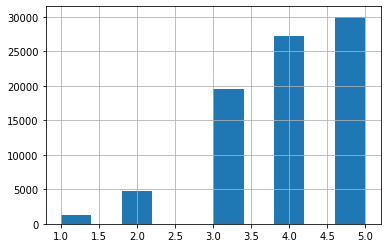

In [183]:
df_records[df_records['quality'].notna()]['quality'].hist()

<AxesSubplot:>

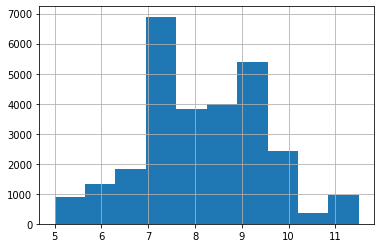

In [87]:
df_records[df_records['shoe_size'].notna()]['shoe_size'].hist()

<AxesSubplot:>

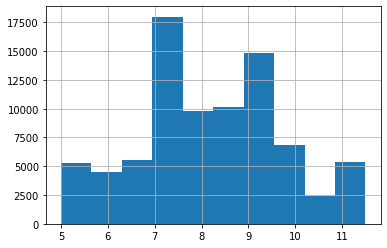

In [118]:
df_records[df_records['shoe_size'].notna()]['shoe_size'].hist()

<AxesSubplot:>

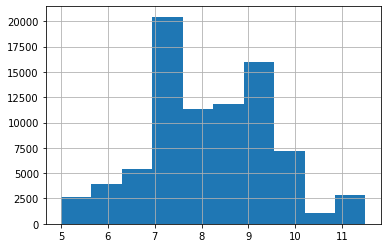

In [184]:
df_records[df_records['shoe_size'].notna()]['shoe_size'].hist()

AxesSubplot(0.125,0.125;0.775x0.755) cup_size
AxesSubplot(0.125,0.125;0.775x0.755) hips
AxesSubplot(0.125,0.125;0.775x0.755) bra_size
AxesSubplot(0.125,0.125;0.775x0.755) quality
AxesSubplot(0.125,0.125;0.775x0.755) shoe_size


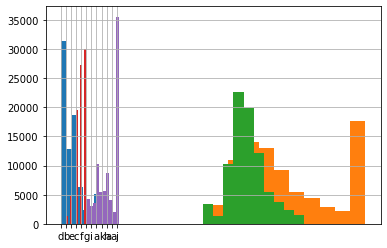

In [97]:
normal_columns = ['cup_size', 'hips', 'bra_size', 'quality', 'shoe_size']
for col in normal_columns:
    print(df_records[df_records[col].notna()][col].hist(), col)

In [189]:
def flatten(t):
    return [item for sublist in t for item in sublist]

In [190]:
from scipy.special import rel_entr

def kullback_leibler(compariser, base):
    return abs(sum(rel_entr(compariser, base)))

In [191]:
def distribution_based_creation(data, quantity, keys):
    base = data.copy()
    chosen = []
    for number in quantity:
        min = 1000000000
        choice = list(data.keys())[0]
        for key in keys:
            data[key] += number
            stats = kullback_leibler(data, base)
            data[key] -= number
            # print(stats)
            if min > stats:
                min = stats
                choice = key
        chosen.append(choice)
        data[choice] += number
    print(min)
    return chosen

In [192]:
df_records['cup_size'] = df_records['cup_size'].replace('dd/e','e').replace('ddd/f','f').replace('dddd/g','g')
# encoder = {"aa":0, "a":2, "b":4, "c":6, "d":8, "e":10, "f":12, "g":14, "h":16, "i":18, "j":20, "k":22}
# decoder = {0:"aa", 2:"a", 4:"b", 6:"c", 8:"d", 10:"e", 12:"f", 14:"g", 16:"h", 18:"i", 20:"j", 22:"k"}

normal_columns = ['cup_size', 'hips', 'bra_size', 'quality', 'shoe_size']
for col in normal_columns:
    test_subjects = df_records[df_records[col].isnull()]['user_id'].value_counts()
    natives = df_records[df_records[col].notnull()][['user_id',col]]
    data = df_records[df_records[col].notnull()][col].value_counts()
    uniq = df_records[df_records[col].notnull()][col].unique()

    # kl = distribution_based_creation(data, [test_subjects[i] for i in test_subjects[test_subjects > 1].keys()], data.keys())
    kl = distribution_based_creation(data, [test_subjects[i] for i in test_subjects.keys()], data.keys())

    dicto = {idx: kl[i] for i, idx in enumerate(test_subjects.keys())}
    # dicto = {idx: kl[i] for i, idx in enumerate(test_subjects[test_subjects <= 1].keys())}
    # dicto.update({idx: uniq[i%len(uniq)] for i, idx in enumerate(test_subjects[test_subjects <= 1].keys())})
    dicto.update({natives['user_id'][i]: natives[col][i] for i in natives.index})
    change = [dicto[idx] for idx in df_records['user_id']]
    df_records[col] = change

6503.91146134716
32272.6523991484
6247.937390626686
68.02795913832094
90004.57758514593


### Median imputation

In [193]:
from sklearn.impute import SimpleImputer
frequent_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

In [194]:
string_columns = ['height']

for col in string_columns:
    df_records[col] = frequent_imputer.fit_transform(np.array(df_records[col]).reshape(-1,1)).squeeze()

df_records.isna().sum()

item_id          0
waist        79908
size             0
quality          0
cup_size         0
hips             0
bra_size         0
category         0
bust         70936
height           0
fit              0
user_id          0
shoe_size        0
dtype: int64

In [195]:
df_records.head()

,item_id,waist,size,quality,cup_size,hips,bra_size,category,bust,height,fit,user_id,shoe_size
0,123373,29.0,7,4.0,d,38.0,34.0,new,36,5ft 6in,small,991571,8.0
1,123373,31.0,13,3.0,b,30.0,36.0,new,NaN,5ft 2in,small,587883,7.0
2,123373,30.0,7,2.0,b,37.0,32.0,new,NaN,5ft 7in,small,395665,9.0
3,123373,NaN,21,5.0,e,50.0,36.0,new,NaN,5ft 4in,fit,875643,9.0
4,123373,NaN,18,4.0,b,34.0,36.0,new,NaN,5ft 2in,small,944840,8.5


### Calculating bust
Looks like bust measurements are being calculated in the US style, to find correlation I've used this pick:

![alt text](table.png "Title")

In [12]:
df_records["bra_size"].unique()

array([34., 36., 32., 46., 38., 42., 40., 44., 30., 48., 28.])

In [13]:
df_records["cup_size"].unique()

array(['d', 'b', 'e', 'c', 'f', 'g', 'i', 'a', 'k', 'h', 'aa', 'j'],
      dtype=object)

In [196]:
def bust_calculation(cup_size, bra_size):
    dicter = {"aa":0, "a":2, "b":4, "c":6, "d":8, "e":10, "f":12, "g":14, "h":16, "i":18, "j":20, "k":22}
    return [71 + (int(bra_size[i]) - 28)*2.5 + dicter[cup_size[i]] for i in range(len(cup_size))]

In [197]:
df_records['bust'] = bust_calculation(df_records['cup_size'], df_records['bra_size'])

seed(0)
# natural_diff = [round(uniform(-0.99, 0.99), 2) for i in range(len(df_records))]
diff = {idx: randint(-1,1)/2 for idx in df_records['user_id'].unique()}
natural_diff = [diff[idx] for idx in df_records['user_id']]
df_records['bust'] = df_records['bust'] + natural_diff

In [198]:
df_records.isna().sum()

item_id          0
waist        79908
size             0
quality          0
cup_size         0
hips             0
bra_size         0
category         0
bust             0
height           0
fit              0
user_id          0
shoe_size        0
dtype: int64

In [199]:
df_records.head()

,item_id,waist,size,quality,cup_size,hips,bra_size,category,bust,height,fit,user_id,shoe_size
0,123373,29.0,7,4.0,d,38.0,34.0,new,94.0,5ft 6in,small,991571,8.0
1,123373,31.0,13,3.0,b,30.0,36.0,new,95.0,5ft 2in,small,587883,7.0
2,123373,30.0,7,2.0,b,37.0,32.0,new,84.5,5ft 7in,small,395665,9.0
3,123373,NaN,21,5.0,e,50.0,36.0,new,101.0,5ft 4in,fit,875643,9.0
4,123373,NaN,18,4.0,b,34.0,36.0,new,95.5,5ft 2in,small,944840,8.5


### Converting height to numeric column

In [200]:
def get_float_height(height):
    """
    Convert string height to float (metres)
    """
    
    output = height.split(' ')
    if len(output) == 2:
        feet, inches = output[0], output[1]
    else:
        feet, inches = output[0], "0in"
    feet = float(re.findall('\d+', feet)[0])
    inches = float(re.findall('\d+', inches)[0])
    
    metres = (feet * 0.3048) + (inches * 0.0254)
    
    return metres

In [201]:
df_records['height'] = df_records['height'].apply(get_float_height)

### Calculating waist

<AxesSubplot:>

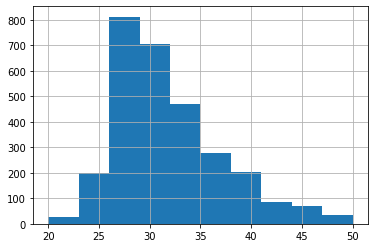

In [127]:
df_records[df_records['waist'].notna()]['waist'].hist()

<AxesSubplot:>

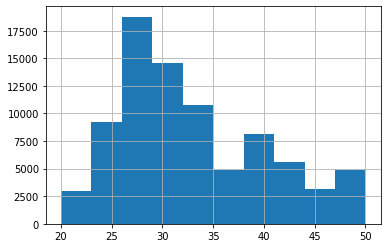

In [148]:
df_records[df_records['waist'].notna()]['waist'].hist()

<AxesSubplot:>

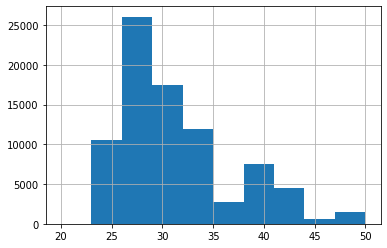

In [179]:
df_records[df_records['waist'].notna()]['waist'].hist()

In [202]:
def conditional_distribution_based_creation(data, quantity, condition):
    base = data.copy()
    chosen = []
    for c, number in enumerate(quantity):
        min = 1000000000
        choice = list(data[condition[c]].keys())[0]
        for key in data[condition[c]].keys():
            data[condition[c]][key] += number
            stats = kullback_leibler(data[condition[c]], base[condition[c]])
            data[condition[c]][key] -= number
            if min > stats:
                min = stats
                choice = key
        chosen.append(choice)
        data[condition[c]][choice] += number
    print(min)
    return chosen

In [204]:
dependancy_sets = {hip: df_records[df_records['hips'] == hip]['waist'].dropna().value_counts() for hip in df_records['hips'].unique()}
# for hip in df_records['hips'].unique():
#     dependancy_sets[hip] = df_records[df_records['hips'] == hip]['waist'].dropna().value_counts()

normal_columns = ['waist']
for col in normal_columns:
    test_subjects = df_records[df_records[col].isnull()]['user_id'].value_counts()
    natives = df_records[df_records[col].notnull()][['user_id',col]]
    uniq = df_records[df_records[col].notnull()][col].unique()
    
    # dist = conditional_distribution_based_creation(dependancy_sets, [test_subjects[i] for i in test_subjects.keys()], [df_records[df_records['user_id']==idx]['hips'].unique()[0] for idx in test_subjects.keys()])
    dist = conditional_distribution_based_creation(dependancy_sets, [test_subjects[i] for i in test_subjects[test_subjects > 1].keys()], [df_records[df_records['user_id']==idx]['hips'].unique()[0] for idx in test_subjects[test_subjects > 1].keys()])

    # dicto = {idx: dist[i] for i, idx in enumerate(test_subjects.keys())}
    dicto = {idx: dist[i] for i, idx in enumerate(test_subjects[test_subjects > 1].keys())}
    dicto.update({idx: uniq[i%len(uniq)] for i, idx in enumerate(test_subjects[test_subjects <= 1].keys())})
    dicto.update({natives['user_id'][i]: natives[col][i] for i in natives.index})
    change = [dicto[idx] for idx in df_records['user_id']]
    df_records[col] = change

0.0


### Normalize Numeric Features

In [205]:
from sklearn.preprocessing import StandardScaler

numeric_columns = ['waist', 'size', 'quality', 'hips', 'bra_size', 'height', 'bust', 'shoe_size']
scaler = StandardScaler()
df_records_numeric = pd.DataFrame(scaler.fit_transform(df_records.loc[:, numeric_columns]), 
                                  columns=numeric_columns)
df_records_numeric.head()

,waist,size,quality,hips,bra_size,height,bust,shoe_size
0,-0.514924,-0.684438,0.034406,-0.404745,-0.611557,0.306343,-0.456166,-0.109296
1,-0.235410,0.040909,-0.983637,-1.777621,0.008607,-1.103900,-0.349617,-0.864510
2,-0.375167,-0.684438,-2.001679,-0.576354,-1.231720,0.658904,-1.468378,0.645919
3,1.022405,1.008039,1.052449,1.654570,0.008607,-0.398778,0.289674,0.645919
4,-0.794438,0.645365,0.034406,-1.091183,0.008607,-1.103900,-0.296343,0.268311


### Convert Categorical Features into Labels

In [206]:
from sklearn.preprocessing import OrdinalEncoder

categorical_columns = ['item_id', 'category', 'cup_size', 'user_id', 'fit']
ordinal_enc = OrdinalEncoder()

df_records_categorical = pd.DataFrame(np.array(ordinal_enc.fit_transform(df_records.loc[:, categorical_columns]), 
                                           dtype=np.int64), columns=categorical_columns)
df_records_categorical.head()

,item_id,category,cup_size,user_id,fit
0,0,2,4,47557,2
1,0,2,2,28324,2
2,0,2,2,19037,2
3,0,2,5,42142,0
4,0,2,2,45350,2


In [207]:
df = pd.concat([df_records_numeric, df_records_categorical], axis=1)
df.head(3)

,waist,size,quality,hips,bra_size,height,bust,shoe_size,item_id,category,cup_size,user_id,fit
0,-0.514924,-0.684438,0.034406,-0.404745,-0.611557,0.306343,-0.456166,-0.109296,0,2,4,47557,2
1,-0.235410,0.040909,-0.983637,-1.777621,0.008607,-1.103900,-0.349617,-0.864510,0,2,2,28324,2
2,-0.375167,-0.684438,-2.001679,-0.576354,-1.231720,0.658904,-1.468378,0.645919,0,2,2,19037,2


In [208]:
# Number of embeddings required for each categorical variable
for col in df_records_categorical.columns:
    print(col, ':', len(df_records_categorical[col].unique()))

item_id : 1378
category : 7
cup_size : 12
user_id : 47958
fit : 3


### Saving the pre-processed data

In [209]:
# Create random train-validation-test splits
# 80-10-10 as in the paper
from sklearn.model_selection import train_test_split
df_train, df_val_test = train_test_split(df, random_state=10, test_size=0.2)
df_val, df_test = train_test_split(df_val_test, random_state=10, test_size=0.5)

In [178]:
save_file = '../data/modcloth_final_data_4_processed'

df_train.to_json(save_file+'_train.jsonl', orient='records', lines=True)
df_val.to_json(save_file+'_valid.jsonl', orient='records', lines=True)
df_test.to_json(save_file+'_test.jsonl', orient='records', lines=True)